In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [11]:
df = pd.read_csv('complete_dataset.csv')

In [12]:
df.head(10)

Unnamed: 0  Borough      Neighborhoods   Latitude  Longitude  Population  \
0           0  Central    Cantonment area  12.972442  77.580643      866377   
1           1  Central             Domlur  12.960992  77.638726      743186   
2           2  Central        Indiranagar  12.971891  77.641151      474289   
3           3  Central  Jeevanbheemanagar  12.962900  77.659500      527874   
4           4  Central        Malleswaram  13.003100  77.564300      893629   
5           5  Central          Pete area  12.962700  77.575800      730999   
6           6  Central        Rajajinagar  12.990100  77.552500      981362   
7           7  Central     Sadashivanagar  13.006800  77.581300      662625   
8           8  Central      Seshadripuram  12.993500  77.578700      396862   
9           9  Central       Shivajinagar  12.985700  77.605700       77836   

        City  AverageIncome  
0  Bangalore   18944.099792  
1  Bangalore   56837.022198  
2  Bangalore   41991.817435  
3  Bangalore    6667.447632  
4  Bangalore   53270.063892  
5  Bangalore   50712.430215  
6  Bangalore   60967.535874  
7  Bangalore   59943.541564  
8  Bangalore   58407.090338  
9  Bangalore   55850.962099

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
bangalore_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [15]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [17]:
bangalore_population.to_csv('population_dataset.csv')

In [18]:
bangalore_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [19]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [20]:
bangalore_income.to_csv('income_dataset.csv')

In [21]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [22]:
CLIENT_ID = 'ZK40VO3EPO1ZY5C04PNYSMQH2ZFZ3U1TPL0QME3WEY553DMH'
CLIENT_SECRET = 'RQBRNE2T3OTMYY4BBJ3YWLS0P2FK413O22MQV1QHBHAD04WG'
VERSION = '20180606'
LIMIT = 150

In [23]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()

In [24]:
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [25]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [26]:
borough_colors

{'Central': '#94F34A',
 'Eastern': '#3E4C66',
 'NorthEastern': '#5B4D60',
 'Northern': '#24F9EF',
 'SouthEastern': '#FE6F40',
 'Southern': '#4AADD0',
 'SouthernSuburbs': '#FD6271',
 'Western': '#9F2A4A'}

In [27]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [28]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [29]:
bangalore_map

In [30]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [31]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [32]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  602


In [33]:
bangalore_venues.head(6)

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
0  Cantonment area  Central              12.972442               77.580643   
1  Cantonment area  Central              12.972442               77.580643   
2  Cantonment area  Central              12.972442               77.580643   
3  Cantonment area  Central              12.972442               77.580643   
4  Cantonment area  Central              12.972442               77.580643   
5  Cantonment area  Central              12.972442               77.580643   

                Venue  Venue Latitude  Venue Longitude      Venue Category  
0      Hotel Fishland       12.975569        77.578592  Seafood Restaurant  
1        Adigas Hotel       12.973554        77.579161          Restaurant  
2    Sapna Book House       12.976355        77.578461           Bookstore  
3      Vasudev Adigas       12.973707        77.579257   Indian Restaurant  
4  Sree Vishnu Bhavan       12.973950        77.579038   Indian Restaurant  
5    Kamat Yatrinivas       12.975985        77.578125   Indian Restaurant

In [34]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(20)

Venue Category
Indian Restaurant                104
Café                              32
Fast Food Restaurant              31
Ice Cream Shop                    23
Bakery                            23
Department Store                  20
Pizza Place                       19
Coffee Shop                       18
Chinese Restaurant                15
Clothing Store                    14
Hotel                             12
Restaurant                        11
Gym                                9
Pub                                8
Sandwich Place                     8
Market                             8
Vegetarian / Vegan Restaurant      8
Breakfast Spot                     8
Lounge                             7
Snack Place                        7
Name: Neighborhood, dtype: int64

In [35]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  129


In [36]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [37]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             6
                Domlur                     11
                Indiranagar                68
                Jeevanbheemanagar           6
                Malleswaram                 7
                Pete area                   5
                Rajajinagar                10
                Sadashivanagar             19
                Seshadripuram               7
                Shivajinagar               13
                Ulsoor                      4
                Vasanth Nagar              28
Eastern         Bellandur                  24
                CV Raman Nagar              6
                Hoodi                       5
                Krishnarajapuram            3
                Mahadevapura                5
                Marathahalli                9
                Varthur                     1
                Whitefield                 10
NorthEastern    Banaswadi                   7
                HBR Layout                  4
                Horamavu                    3
                Kammanahalli               10
                Lingarajapuram              1
                Ramamurthy Nagar            6
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  14
                R. T. Nagar                 9
                Vidyaranyapura              2
                Yelahanka                   4
                Yeshwanthpur                7
SouthEastern    BTM Layout                 36
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             5
                HSR Layout                 11
                Koramangala                 6
                Madiwala                   26
Southern        Banashankari                9
                Basavanagudi                9
                Girinagar                   3
                J. P. Nagar                27
                Jayanagar                  15
                Kumaraswamy Layout          8
                Padmanabhanagar             4
                Uttarahalli                12
SouthernSuburbs Anjanapura                  1
                Arekere                    24
                Begur                       4
                Gottigere                   5
                Hulimavu                    5
                Kothnur                     5
Western         Basaveshwaranagar          20
                Kamakshipalya               2
                Kengeri                     6
                Mahalakshmi Layout         10
                Nagarbhavi                  5
                Nandini Layout              1
                Nayandahalli                5
                Rajarajeshwari Nagar        6
                Vijayanagar                 3

In [38]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [39]:
individual_bangalore_venue_count.reset_index(inplace=True)

In [40]:
individual_bangalore_venue_count

Borough          Neighborhood  NumberOfVenues
0           Central       Cantonment area               6
1           Central                Domlur              11
2           Central           Indiranagar              68
3           Central     Jeevanbheemanagar               6
4           Central           Malleswaram               7
5           Central             Pete area               5
6           Central           Rajajinagar              10
7           Central        Sadashivanagar              19
8           Central         Seshadripuram               7
9           Central          Shivajinagar              13
10          Central                Ulsoor               4
11          Central         Vasanth Nagar              28
12          Eastern             Bellandur              24
13          Eastern        CV Raman Nagar               6
14          Eastern                 Hoodi               5
15          Eastern      Krishnarajapuram               3
16          Eastern          Mahadevapura               5
17          Eastern          Marathahalli               9
18          Eastern               Varthur               1
19          Eastern            Whitefield              10
20     NorthEastern             Banaswadi               7
21     NorthEastern            HBR Layout               4
22     NorthEastern              Horamavu               3
23     NorthEastern          Kammanahalli              10
24     NorthEastern        Lingarajapuram               1
25     NorthEastern      Ramamurthy Nagar               6
26         Northern                Hebbal               7
27         Northern             Jalahalli               3
28         Northern             Mathikere              14
29         Northern           R. T. Nagar               9
30         Northern        Vidyaranyapura               2
31         Northern             Yelahanka               4
32         Northern          Yeshwanthpur               7
33     SouthEastern            BTM Layout              36
34     SouthEastern          Bommanahalli               4
35     SouthEastern           Bommasandra               1
36     SouthEastern       Electronic City               5
37     SouthEastern            HSR Layout              11
38     SouthEastern           Koramangala               6
39     SouthEastern              Madiwala              26
40         Southern          Banashankari               9
41         Southern          Basavanagudi               9
42         Southern             Girinagar               3
43         Southern           J. P. Nagar              27
44         Southern             Jayanagar              15
45         Southern    Kumaraswamy Layout               8
46         Southern       Padmanabhanagar               4
47         Southern           Uttarahalli              12
48  SouthernSuburbs            Anjanapura               1
49  SouthernSuburbs               Arekere              24
50  SouthernSuburbs                 Begur               4
51  SouthernSuburbs             Gottigere               5
52  SouthernSuburbs              Hulimavu               5
53  SouthernSuburbs               Kothnur               5
54          Western     Basaveshwaranagar              20
55          Western         Kamakshipalya               2
56          Western               Kengeri               6
57          Western    Mahalakshmi Layout              10
58          Western            Nagarbhavi               5
59          Western        Nandini Layout               1
60          Western          Nayandahalli               5
61          Western  Rajarajeshwari Nagar               6
62          Western           Vijayanagar               3

[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

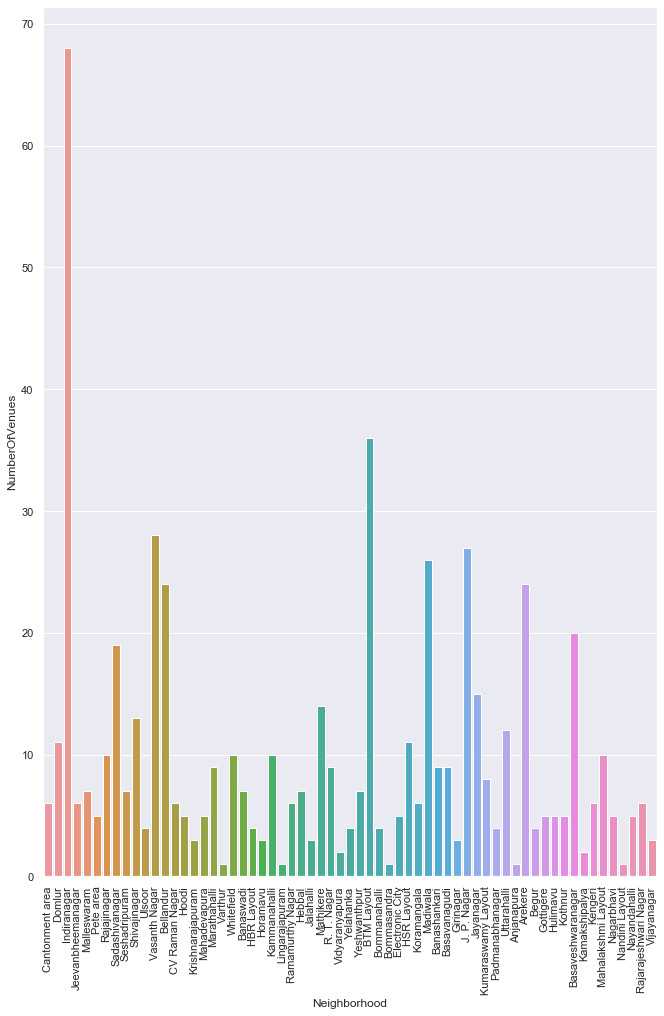

In [41]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

In [42]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

Neighborhood  Borough  Neighborhood Latitude  Neighborhood Longitude  \
237   Whitefield  Eastern                12.9698                 77.7499   
238   Whitefield  Eastern                12.9698                 77.7499   
239   Whitefield  Eastern                12.9698                 77.7499   
240   Whitefield  Eastern                12.9698                 77.7499   
241   Whitefield  Eastern                12.9698                 77.7499   
242   Whitefield  Eastern                12.9698                 77.7499   
243   Whitefield  Eastern                12.9698                 77.7499   
244   Whitefield  Eastern                12.9698                 77.7499   
245   Whitefield  Eastern                12.9698                 77.7499   
246   Whitefield  Eastern                12.9698                 77.7499   

                                     Venue  Venue Latitude  Venue Longitude  \
237                       Herbs and Spices       12.968145        77.750862   
238                              Golds Gym       12.972217        77.750529   
239                           Chef Baker's       12.969730        77.751302   
240                    Royal Orchid Suites       12.966774        77.751262   
241         The river side bar and kitchen       12.967298        77.749614   
242                     Bangalore Mandarin       12.969631        77.750130   
243  Cult - The Workout Station Whitefield       12.968434        77.749597   
244                             Cheenavala       12.966435        77.749368   
245                               Calvin's       12.973117        77.749514   
246                                refresh       12.965621        77.749234   

                  Venue Category  
237  Eastern European Restaurant  
238         Gym / Fitness Center  
239                       Bakery  
240                        Hotel  
241                    Hotel Bar  
242           Chinese Restaurant  
243         Gym / Fitness Center  
244            Kerala Restaurant  
245                         Café  
246                         Café

In [43]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])

In [44]:
bangalore_venues_onehot

Venue Category_ATM  Venue Category_Accessories Store  \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   
5                     0                                 0   
6                     0                                 0   
7                     0                                 0   
8                     0                                 0   
9                     0                                 0   
10                    0                                 0   
11                    0                                 0   
12                    0                                 0   
13                    0                                 0   
14                    0                                 0   
15                    0                                 0   
16                    0                                 0   
17                    0                                 0   
18                    0                                 0   
19                    0                                 0   
20                    0                                 0   
21                    0                                 0   
22                    0                                 0   
23                    0                                 0   
24                    0                                 0   
25                    0                                 0   
26                    0                                 0   
27                    0                                 0   
28                    0                                 0   
29                    0                                 0   
30                    0                                 0   
31                    0                                 0   
32                    0                                 0   
33                    0                                 0   
34                    0                                 0   
35                    0                                 0   
36                    0                                 0   
37                    0                                 0   
38                    0                                 0   
39                    0                                 0   
40                    0                                 0   
41                    0                                 0   
42                    0                                 0   
43                    0                                 0   
44                    0                                 0   
45                    0                                 0   
46                    0                                 0   
47                    0                                 0   
48                    0                                 0   
49                    0                                 0   
50                    0                                 0   
51                    0                                 0   
52                    0                                 0   
53                    0                                 0   
54                    0                                 0   
55                    0                                 0   
56                    0                                 0   
57                    0                                 0   
58                    0                                 0   
59                    0                                 0   
60                    0                                 0   
61                    0                                 0   
62                    0                                 0   
63                    0                                 0   
64                    0                 

In [45]:

bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

Neighborhood  Venue Category_ATM  \
0             Anjanapura                1.00   
1                Arekere                0.00   
2             BTM Layout                0.00   
3           Banashankari                0.00   
4              Banaswadi                0.00   
5           Basavanagudi                0.00   
6      Basaveshwaranagar                0.00   
7                  Begur                0.00   
8              Bellandur                0.00   
9           Bommanahalli                0.00   
10           Bommasandra                0.00   
11        CV Raman Nagar                0.00   
12       Cantonment area                0.00   
13                Domlur                0.00   
14       Electronic City                0.00   
15             Girinagar                0.00   
16             Gottigere                0.00   
17            HBR Layout                0.00   
18            HSR Layout                0.00   
19                Hebbal                0.00   
20                 Hoodi                0.00   
21              Horamavu                0.00   
22              Hulimavu                0.00   
23           Indiranagar                0.00   
24           J. P. Nagar                0.00   
25             Jalahalli                0.00   
26             Jayanagar                0.00   
27     Jeevanbheemanagar                0.00   
28         Kamakshipalya                0.50   
29          Kammanahalli                0.00   
30               Kengeri                0.00   
31           Koramangala                0.00   
32               Kothnur                0.00   
33      Krishnarajapuram                0.00   
34    Kumaraswamy Layout                0.00   
35        Lingarajapuram                0.00   
36              Madiwala                0.00   
37          Mahadevapura                0.00   
38    Mahalakshmi Layout                0.00   
39           Malleswaram                0.00   
40          Marathahalli                0.00   
41             Mathikere                0.00   
42            Nagarbhavi                0.00   
43        Nandini Layout                0.00   
44          Nayandahalli                0.00   
45       Padmanabhanagar                0.00   
46             Pete area                0.00   
47           R. T. Nagar                0.00   
48           Rajajinagar                0.00   
49  Rajarajeshwari Nagar                0.00   
50      Ramamurthy Nagar                0.00   
51        Sadashivanagar                0.00   
52         Seshadripuram                0.00   
53          Shivajinagar                0.00   
54                Ulsoor                0.00   
55           Uttarahalli                0.00   
56               Varthur                0.00   
57         Vasanth Nagar                0.00   
58        Vidyaranyapura                0.00   
59           Vijayanagar                0.00   
60            Whitefield                0.00   
61             Yelahanka                0.25   
62          Yeshwanthpur                0.00   

    Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                           0.000000                          0.000000   
1                           0.000000                          0.000000   
2                           0.000000                          0.000000   
3                           0.111111                          0.000000   
4                           0.000000                          0.000000   
5                           0.000000                          0.000000   
6                           0.000000                          0.000000   
7                           0.000000                          0.000000   
8                           0.000000                          0.000000   
9                           0.000000                          0.000000   
10                          0.000000                          0.000000   
11                          0.000000               

In [46]:
number_of_top_venues = 5

In [47]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                  Venue  Frequency
0                    Venue Category_ATM        1.0
1    Venue Category_Indie Movie Theater        0.0
2            Venue Category_Pizza Place        0.0
3               Venue Category_Pharmacy        0.0
4  Venue Category_Performing Arts Venue        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.12
1  Venue Category_Sporting Goods Shop       0.12
2     Venue Category_Department Store       0.12
3          Venue Category_Pizza Place       0.08
4   Venue Category_Mughlai Restaurant       0.08


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.22
1                    Venue Category_Snack Place       0.08
2                 Venue Category_Ice Cream Shop       0.08
3  Venue Category_Vegetarian / Vegan Restaurant       0.06
4          

4       Venue Category_Optical Shop        0.0


--------- Mahalakshmi Layout ---------
                              Venue  Frequency
0        Venue Category_Coffee Shop        0.2
1              Venue Category_Hotel        0.2
2  Venue Category_Indian Restaurant        0.1
3        Venue Category_Gas Station        0.1
4            Venue Category_Brewery        0.1


--------- Malleswaram ---------
                              Venue  Frequency
0     Venue Category_Ice Cream Shop       0.43
1  Venue Category_Indian Restaurant       0.14
2     Venue Category_Breakfast Spot       0.14
3                Venue Category_Gym       0.14
4             Venue Category_Bakery       0.14


--------- Marathahalli ---------
                              Venue  Frequency
0     Venue Category_Clothing Store       0.44
1  Venue Category_Indian Restaurant       0.22
2      Venue Category_Movie Theater       0.11
3         Venue Category_Shoe Store       0.11
4       Venue Category_Dessert Shop       0.

In [48]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [49]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari  Venue Category_Indian Restaurant   
4     Banaswadi  Venue Category_Indian Restaurant   

                      2nd Most Common Venue            3rd Most Common Venue  \
0  Venue Category_Indian Chinese Restaurant     Venue Category_Deli / Bodega   
1        Venue Category_Sporting Goods Shop  Venue Category_Department Store   
2             Venue Category_Ice Cream Shop       Venue Category_Snack Place   
3             Venue Category_Clothing Store              Venue Category_Café   
4                     Venue Category_Bakery              Venue Category_Café   

               4th Most Common Venue                5th Most Common Venue  \
0    Venue Category_Department Store          Venue Category_Dessert Shop   
1  Venue Category_Mughlai Restaurant           Venue Category_Pizza Place   
2              Venue Category_Bakery  Venue Category_Fast Food Restaurant   
3  Venue Category_Miscellaneous Shop           Venue Category_Pizza Place   
4       Venue Category_Grocery Store                Venue Category_Market   

               6th Most Common Venue  \
0  Venue Category_Dim Sum Restaurant   
1      Venue Category_Ice Cream Shop   
2         Venue Category_Pizza Place   
3   Venue Category_Accessories Store   
4            Venue Category_Pharmacy   

                          7th Most Common Venue        8th Most Common Venue  \
0                          Venue Category_Diner    Venue Category_Donut Shop   
1           Venue Category_Gym / Fitness Center  Venue Category_Liquor Store   
2             Venue Category_Chinese Restaurant          Venue Category_Café   
3                     Venue Category_Hookah Bar   Venue Category_Flea Market   
4  Venue Category_Vegetarian / Vegan Restaurant   Venue Category_Flea Market   

                        9th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1           Venue Category_Chinese Restaurant   
2               Venue Category_Sandwich Place   
3             Venue Category_Department Store   
4                Venue Category_Deli / Bodega   

             10th Most Common Venue  
0  Venue Category_Electronics Store  
1           Venue Category_Bus Line  
2        Venue Category_Coffee Shop  
3       Venue Category_Dessert Shop  
4   Venue Category_Department Store

In [50]:
neighborhoods_venues_sorted.shape

(63, 11)

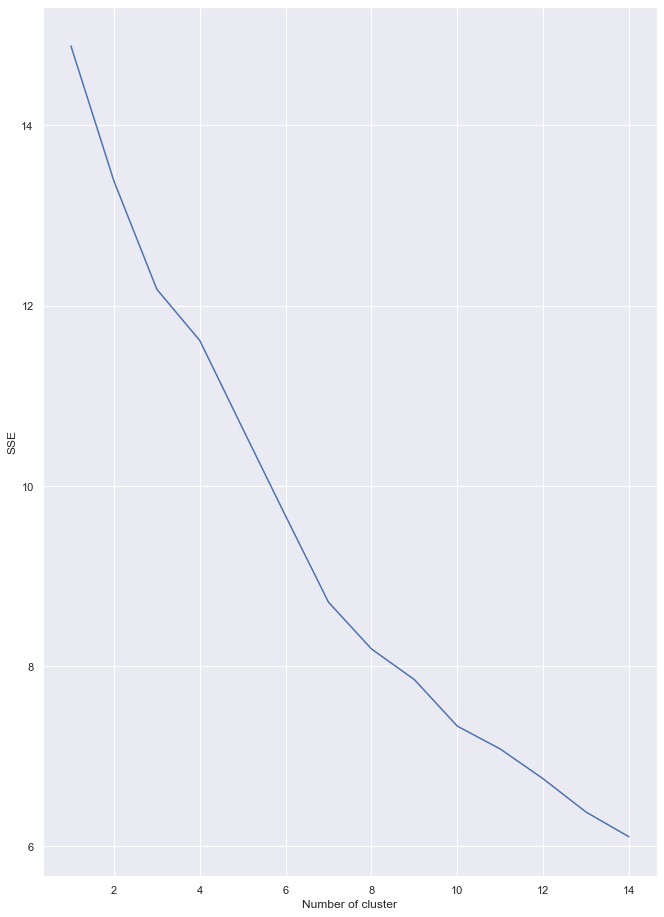

In [51]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [52]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [53]:
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [54]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_

In [55]:
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    15
1    26
2     5
3    13
4     4
Name: Neighborhood, dtype: int64

In [56]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Accessories Store', 'Venue Category_Andhra Restaurant',
       'Venue Category_Art Museum', 'Venue Category_Asian Restaurant',
       'Venue Category_Athletics & Sports', 'Venue Category_Auto Garage',
       'Venue Category_BBQ Joint', 'Venue Category_Badminton Court',
       ...
       'Venue Category_Tex-Mex Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=131)

In [57]:

neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')

In [58]:
neighborhoods_venues_sorted.head(6)

Neighborhood             1st Most Common Venue  \
0    Anjanapura                Venue Category_ATM   
1       Arekere  Venue Category_Indian Restaurant   
2    BTM Layout  Venue Category_Indian Restaurant   
3  Banashankari  Venue Category_Indian Restaurant   
4     Banaswadi  Venue Category_Indian Restaurant   
5  Basavanagudi  Venue Category_Indian Restaurant   

                      2nd Most Common Venue            3rd Most Common Venue  \
0  Venue Category_Indian Chinese Restaurant     Venue Category_Deli / Bodega   
1        Venue Category_Sporting Goods Shop  Venue Category_Department Store   
2             Venue Category_Ice Cream Shop       Venue Category_Snack Place   
3             Venue Category_Clothing Store              Venue Category_Café   
4                     Venue Category_Bakery              Venue Category_Café   
5   Venue Category_Mediterranean Restaurant        Venue Category_Hookah Bar   

               4th Most Common Venue                5th Most Common Venue  \
0    Venue Category_Department Store          Venue Category_Dessert Shop   
1  Venue Category_Mughlai Restaurant           Venue Category_Pizza Place   
2              Venue Category_Bakery  Venue Category_Fast Food Restaurant   
3  Venue Category_Miscellaneous Shop           Venue Category_Pizza Place   
4       Venue Category_Grocery Store                Venue Category_Market   
5  Venue Category_Athletics & Sports                  Venue Category_Café   

               6th Most Common Venue  \
0  Venue Category_Dim Sum Restaurant   
1      Venue Category_Ice Cream Shop   
2         Venue Category_Pizza Place   
3   Venue Category_Accessories Store   
4            Venue Category_Pharmacy   
5          Venue Category_Restaurant   

                          7th Most Common Venue  \
0                          Venue Category_Diner   
1           Venue Category_Gym / Fitness Center   
2             Venue Category_Chinese Restaurant   
3                     Venue Category_Hookah Bar   
4  Venue Category_Vegetarian / Vegan Restaurant   
5              Venue Category_Electronics Store   

              8th Most Common Venue  \
0         Venue Category_Donut Shop   
1       Venue Category_Liquor Store   
2               Venue Category_Café   
3        Venue Category_Flea Market   
4        Venue Category_Flea Market   
5  Venue Category_Fish & Chips Shop   

                        9th Most Common Venue  \
0  Venue Category_Eastern European Restaurant   
1           Venue Category_Chinese Restaurant   
2               Venue Category_Sandwich Place   
3             Venue Category_Department Store   
4                Venue Category_Deli / Bodega   
5         Venue Category_Fast Food Restaurant   

              10th Most Common Venue  Venue Category_ATM  \
0   Venue Category_Electronics Store                 1.0   
1            Venue Category_Bus Line                 0.0   
2         Venue Category_Coffee Shop                 0.0   
3        Venue Category_Dessert Shop                 0.0   
4    Venue Category_Department Store                 0.0   
5  Venue Category_Falafel Restaurant                 0.0   

   Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                          0.000000                               0.0   
1                          0.000000                               0.0   
2                          0.000000                               0.0   
3                          0.111111                               0.0   
4                          0.000000                               0.0   
5                          0.000000                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4              

In [59]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [60]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [61]:
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [62]:
map_clusters

In [63]:
bangalore_income.head()

Borough      Neighborhoods  AverageIncome
0  Central    Cantonment area   18944.099792
1  Central             Domlur   56837.022198
2  Central        Indiranagar   41991.817435
3  Central  Jeevanbheemanagar    6667.447632
4  Central        Malleswaram   53270.063892

In [64]:
bangalore_population.head()

Borough      Neighborhoods  Population
0  Central    Cantonment area      866377
1  Central             Domlur      743186
2  Central        Indiranagar      474289
3  Central  Jeevanbheemanagar      527874
4  Central        Malleswaram      893629

In [65]:
bangalore_population['Normalized_population'] = bangalore_population['Population']/bangalore_population['Population'].max(axis=0)
bangalore_population.head()

Borough      Neighborhoods  Population  Normalized_population
0  Central    Cantonment area      866377               0.880810
1  Central             Domlur      743186               0.755567
2  Central        Indiranagar      474289               0.482190
3  Central  Jeevanbheemanagar      527874               0.536668
4  Central        Malleswaram      893629               0.908516

In [66]:

bangalore_income['Normalized_income'] = bangalore_income['AverageIncome']/bangalore_income['AverageIncome'].max(axis=0)
bangalore_income.head()

Borough      Neighborhoods  AverageIncome  Normalized_income
0  Central    Cantonment area   18944.099792           0.293051
1  Central             Domlur   56837.022198           0.879225
2  Central        Indiranagar   41991.817435           0.649581
3  Central  Jeevanbheemanagar    6667.447632           0.103140
4  Central        Malleswaram   53270.063892           0.824047

In [67]:
bangalore_venues_grouped.head(1)

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0   Anjanapura                 1.0                               0.0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                               0.0                        0.0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                              0.0                                0.0   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                         0.0                       0.0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                             0.0                    0.0                 0.0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                0.0                    0.0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                       0.0                      0.0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                            0.0                     0.0   

   Venue Category_Burger Joint  Venue Category_Bus Line  \
0                          0.0                      0.0   

   Venue Category_Bus Station  Venue Category_Bus Stop  \
0                         0.0                      0.0   

   Venue Category_Business Service  Venue Category_Café  \
0                              0.0                  0.0   

   Venue Category_Chaat Place  Venue Category_Chinese Restaurant  \
0                         0.0                                0.0   

   Venue Category_Chocolate Shop  Venue Category_Clothing Store  \
0                            0.0                            0.0   

   Venue Category_Cocktail Bar  Venue Category_Coffee Shop  \
0                          0.0                         0.0   

   Venue Category_Concert Hall  Venue Category_Convenience Store  \
0                          0.0                               0.0   

   Venue Category_Cosmetics Shop  Venue Category_Cupcake Shop  \
0                            0.0                          0.0   

   Venue Category_Deli / Bodega  Venue Category_Department Store  \
0                           0.0                              0.0   

   Venue Category_Dessert Shop  Venue Category_Dim Sum Restaurant  \
0                          0.0                                0.0   

   Venue Category_Diner  Venue Category_Donut Shop  \
0                   0.0                        0.0   

   Venue Category_Eastern European Restaurant  \
0                                         0.0   

   Venue Category_Electronics Store  Venue Category_Falafel Restaurant  \
0                               0.0                                0.0   

   Venue Category_Fast Food Restaurant  Venue Category_Fish & Chips Shop  \
0                                  0.0                               0.0   

   Venue Category_Flea Market  Venue Category_Food & Drink Shop  \
0                         0.0                               0.0   

   Venue Category_Food Court  Venue Category_Food Truck  \
0                        0.0                        0.0   

   Venue Category_French Restaurant  Venue Category_Furniture / Home Store  \
0                               0.0                                    0.0   

   Venue Category_Gas Station  Venue Category_Gourmet Shop  \
0                         0.0                          0.0   

   Venue Category_Grocery Store  Venue Category_Gym  \
0                           0.0                 0.0   

   Venue Category_Gym / Fitness Center  Venue Category_Halal Restaurant  \
0                                  0.0                              0.0   

   Venue Category_Historic Site  Venue Category_Home Service  \
0                           0.0                          0.0   

   Venue Category_Hookah Bar  Venue Category_Hotel  Venue Category_Hotel Bar  \
0                        0.0                   0.0                       0.0   

   Venue Category_Hyderabadi Restaurant  V

In [68]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

Neighborhood  Venue Category_ATM  Venue Category_Accessories Store  \
0    Anjanapura                   1                                 0   
1       Arekere                   0                                 0   
2    BTM Layout                   0                                 0   
3  Banashankari                   0                                 1   
4     Banaswadi                   0                                 0   

   Venue Category_Andhra Restaurant  Venue Category_Art Museum  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   

   Venue Category_Asian Restaurant  Venue Category_Athletics & Sports  \
0                                0                                  0   
1                                0                                  1   
2                                0                                  0   
3                                0                                  0   
4                                0                                  0   

   Venue Category_Auto Garage  Venue Category_BBQ Joint  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   

   Venue Category_Badminton Court  Venue Category_Bakery  Venue Category_Bar  \
0                               0                      0                   0   
1                               0                      0                   1   
2                               0                      2                   0   
3                               0                      0                   0   
4                               0                      1                   0   

   Venue Category_Bengali Restaurant  Venue Category_Bistro  \
0                                  0                      0   
1                                  0                      0   
2                                  0                      0   
3                                  0                      0   
4                                  0                      0   

   Venue Category_Bookstore  Venue Category_Boutique  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   Venue Category_Breakfast Spot  Venue Category_Brewery  \
0                              0                       0   
1                              1                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   

   Venue Category_Burger Joint  Venue Category_Bus Line  \
0                            0                        0   
1                            0                        1   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   Venue Category_Bus Station  Venue Category_Bus Stop  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   

   Venue Category_Business Service  Venue Category_Café  \
0                                0                  

In [69]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']

0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    1
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    1
44    0
45    0
46    0
47    0
48    1
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    0
61    0
62    0
Name: Venue Category_Vegetarian / Vegan Restaurant, dtype: uint8

In [70]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [71]:
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [72]:

bangalore_veg.head()

Neighborhood  NumberOfVegRestaurants
0    Anjanapura                       0
1       Arekere                       0
2    BTM Layout                       2
3  Banashankari                       0
4     Banaswadi                       1

In [73]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))

In [74]:
bangalore_veg.head(10)

Neighborhood  NumberOfVegRestaurants  NumberOfNonVeganrestaurants
0         Anjanapura                       0                          1.0
1            Arekere                       0                          1.0
2         BTM Layout                       2                          0.0
3       Banashankari                       0                          1.0
4          Banaswadi                       1                          0.5
5       Basavanagudi                       0                          1.0
6  Basaveshwaranagar                       0                          1.0
7              Begur                       0                          1.0
8          Bellandur                       0                          1.0
9       Bommanahalli                       0                          1.0

In [75]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

In [76]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [77]:
target_cluster_dataframe.reset_index()

index Neighborhood 1st Most Common Venue  \
0    581   Whitefield   Venue Category_Café   
1    582   Whitefield   Venue Category_Café   
2    583   Whitefield   Venue Category_Café   
3    584   Whitefield   Venue Category_Café   
4    585   Whitefield   Venue Category_Café   
5    586   Whitefield   Venue Category_Café   
6    587   Whitefield   Venue Category_Café   
7    588   Whitefield   Venue Category_Café   
8    589   Whitefield   Venue Category_Café   
9    590   Whitefield   Venue Category_Café   

                 2nd Most Common Venue  \
0  Venue Category_Gym / Fitness Center   
1  Venue Category_Gym / Fitness Center   
2  Venue Category_Gym / Fitness Center   
3  Venue Category_Gym / Fitness Center   
4  Venue Category_Gym / Fitness Center   
5  Venue Category_Gym / Fitness Center   
6  Venue Category_Gym / Fitness Center   
7  Venue Category_Gym / Fitness Center   
8  Venue Category_Gym / Fitness Center   
9  Venue Category_Gym / Fitness Center   

                        3rd Most Common Venue     4th Most Common Venue  \
0  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
1  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
2  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
3  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
4  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
5  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
6  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
7  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
8  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   
9  Venue Category_Eastern European Restaurant  Venue Category_Hotel Bar   

  5th Most Common Venue              6th Most Common Venue  \
0  Venue Category_Hotel  Venue Category_Chinese Restaurant   
1  Venue Category_Hotel  Venue Category_Chinese Restaurant   
2  Venue Category_Hotel  Venue Category_Chinese Restaurant   
3  Venue Category_Hotel  Venue Category_Chinese Restaurant   
4  Venue Category_Hotel  Venue Category_Chinese Restaurant   
5  Venue Category_Hotel  Venue Category_Chinese Restaurant   
6  Venue Category_Hotel  Venue Category_Chinese Restaurant   
7  Venue Category_Hotel  Venue Category_Chinese Restaurant   
8  Venue Category_Hotel  Venue Category_Chinese Restaurant   
9  Venue Category_Hotel  Venue Category_Chinese Restaurant   

              7th Most Common Venue  8th Most Common Venue  \
0  Venue Category_Kerala Restaurant  Venue Category_Bakery   
1  Venue Category_Kerala Restaurant  Venue Category_Bakery   
2  Venue Category_Kerala Restaurant  Venue Category_Bakery   
3  Venue Category_Kerala Restaurant  Venue Category_Bakery   
4  Venue Category_Kerala Restaurant  Venue Category_Bakery   
5  Venue Category_Kerala Restaurant  Venue Category_Bakery   
6  Venue Category_Kerala Restaurant  Venue Category_Bakery   
7  Venue Category_Kerala Restaurant  Venue Category_Bakery   
8  Venue Category_Kerala Restaurant  Venue Category_Bakery   
9  Venue Category_Kerala Restaurant  Venue Category_Bakery   

              9th Most Common Venue            10th Most Common Venue  \
0  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
1  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
2  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
3  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
4  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
5  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
6  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
7  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
8  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   
9  Venue Category_Electronics Store  Venue Category_Fish & Chips Shop   

   Venue Category_ATM  Ven

In [78]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

In [79]:
target_cluster

0

In [80]:
print("The target cluster is : ",target_cluster)

The target cluster is :  0


In [81]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

Neighborhood             1st Most Common Venue  \
61  Banashankari  Venue Category_Indian Restaurant   
62  Banashankari  Venue Category_Indian Restaurant   
63  Banashankari  Venue Category_Indian Restaurant   
64  Banashankari  Venue Category_Indian Restaurant   
65  Banashankari  Venue Category_Indian Restaurant   

            2nd Most Common Venue 3rd Most Common Venue  \
61  Venue Category_Clothing Store   Venue Category_Café   
62  Venue Category_Clothing Store   Venue Category_Café   
63  Venue Category_Clothing Store   Venue Category_Café   
64  Venue Category_Clothing Store   Venue Category_Café   
65  Venue Category_Clothing Store   Venue Category_Café   

                4th Most Common Venue       5th Most Common Venue  \
61  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
62  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
63  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
64  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
65  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   

               6th Most Common Venue      7th Most Common Venue  \
61  Venue Category_Accessories Store  Venue Category_Hookah Bar   
62  Venue Category_Accessories Store  Venue Category_Hookah Bar   
63  Venue Category_Accessories Store  Venue Category_Hookah Bar   
64  Venue Category_Accessories Store  Venue Category_Hookah Bar   
65  Venue Category_Accessories Store  Venue Category_Hookah Bar   

         8th Most Common Venue            9th Most Common Venue  \
61  Venue Category_Flea Market  Venue Category_Department Store   
62  Venue Category_Flea Market  Venue Category_Department Store   
63  Venue Category_Flea Market  Venue Category_Department Store   
64  Venue Category_Flea Market  Venue Category_Department Store   
65  Venue Category_Flea Market  Venue Category_Department Store   

         10th Most Common Venue  Venue Category_ATM  \
61  Venue Category_Dessert Shop                 0.0   
62  Venue Category_Dessert Shop                 0.0   
63  Venue Category_Dessert Shop                 0.0   
64  Venue Category_Dessert Shop                 0.0   
65  Venue Category_Dessert Shop                 0.0   

    Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
61                          0.111111                               0.0   
62                          0.111111                               0.0   
63                          0.111111                               0.0   
64                          0.111111                               0.0   
65                          0.111111                               0.0   

    Venue Category_Art Museum  Venue Category_Asian Restaurant  \
61                        0.0                              0.0   
62                        0.0                              0.0   
63                        0.0                              0.0   
64                        0.0                              0.0   
65                        0.0                              0.0   

    Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
61                                0.0                         0.0   
62                                0.0                         0.0   
63                                0.0                         0.0   
64                                0.0                         0.0   
65                                0.0                         0.0   

    Venue Category_BBQ Joint  Venue Category_Badminton Court  \
61                       0.0                             0.0   
62                       0.0                             0.0   
63                       0.0                             0.0   
64                       0.0                             0.0   
65                       0.0                             0.0   

    Venue Category_Bakery  Venue Category_Bar  \
61                    0.0                 0.0   
62                    0.0       

In [82]:

print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 206 neighborhoods which has similar characteristics to Whitefield.


In [83]:

possible_neighborhoods.reset_index().head()

index  Neighborhood             1st Most Common Venue  \
0     61  Banashankari  Venue Category_Indian Restaurant   
1     62  Banashankari  Venue Category_Indian Restaurant   
2     63  Banashankari  Venue Category_Indian Restaurant   
3     64  Banashankari  Venue Category_Indian Restaurant   
4     65  Banashankari  Venue Category_Indian Restaurant   

           2nd Most Common Venue 3rd Most Common Venue  \
0  Venue Category_Clothing Store   Venue Category_Café   
1  Venue Category_Clothing Store   Venue Category_Café   
2  Venue Category_Clothing Store   Venue Category_Café   
3  Venue Category_Clothing Store   Venue Category_Café   
4  Venue Category_Clothing Store   Venue Category_Café   

               4th Most Common Venue       5th Most Common Venue  \
0  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
1  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
2  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
3  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
4  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   

              6th Most Common Venue      7th Most Common Venue  \
0  Venue Category_Accessories Store  Venue Category_Hookah Bar   
1  Venue Category_Accessories Store  Venue Category_Hookah Bar   
2  Venue Category_Accessories Store  Venue Category_Hookah Bar   
3  Venue Category_Accessories Store  Venue Category_Hookah Bar   
4  Venue Category_Accessories Store  Venue Category_Hookah Bar   

        8th Most Common Venue            9th Most Common Venue  \
0  Venue Category_Flea Market  Venue Category_Department Store   
1  Venue Category_Flea Market  Venue Category_Department Store   
2  Venue Category_Flea Market  Venue Category_Department Store   
3  Venue Category_Flea Market  Venue Category_Department Store   
4  Venue Category_Flea Market  Venue Category_Department Store   

        10th Most Common Venue  Venue Category_ATM  \
0  Venue Category_Dessert Shop                 0.0   
1  Venue Category_Dessert Shop                 0.0   
2  Venue Category_Dessert Shop                 0.0   
3  Venue Category_Dessert Shop                 0.0   
4  Venue Category_Dessert Shop                 0.0   

   Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                          0.111111                               0.0   
1                          0.111111                               0.0   
2                          0.111111                               0.0   
3                          0.111111                               0.0   
4                          0.111111                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  \
0                    0.0                 0.0   
1                    0.0                 0.0   
2  

In [84]:

possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [85]:

possible_neighborhoods = possible_neighborhoods.merge(bangalore_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [86]:

possible_neighborhoods.head()

Neighborhoods             1st Most Common Venue  \
0  Banashankari  Venue Category_Indian Restaurant   
1  Banashankari  Venue Category_Indian Restaurant   
2  Banashankari  Venue Category_Indian Restaurant   
3  Banashankari  Venue Category_Indian Restaurant   
4  Banashankari  Venue Category_Indian Restaurant   

           2nd Most Common Venue 3rd Most Common Venue  \
0  Venue Category_Clothing Store   Venue Category_Café   
1  Venue Category_Clothing Store   Venue Category_Café   
2  Venue Category_Clothing Store   Venue Category_Café   
3  Venue Category_Clothing Store   Venue Category_Café   
4  Venue Category_Clothing Store   Venue Category_Café   

               4th Most Common Venue       5th Most Common Venue  \
0  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
1  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
2  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
3  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
4  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   

              6th Most Common Venue      7th Most Common Venue  \
0  Venue Category_Accessories Store  Venue Category_Hookah Bar   
1  Venue Category_Accessories Store  Venue Category_Hookah Bar   
2  Venue Category_Accessories Store  Venue Category_Hookah Bar   
3  Venue Category_Accessories Store  Venue Category_Hookah Bar   
4  Venue Category_Accessories Store  Venue Category_Hookah Bar   

        8th Most Common Venue            9th Most Common Venue  \
0  Venue Category_Flea Market  Venue Category_Department Store   
1  Venue Category_Flea Market  Venue Category_Department Store   
2  Venue Category_Flea Market  Venue Category_Department Store   
3  Venue Category_Flea Market  Venue Category_Department Store   
4  Venue Category_Flea Market  Venue Category_Department Store   

        10th Most Common Venue  Venue Category_ATM  \
0  Venue Category_Dessert Shop                 0.0   
1  Venue Category_Dessert Shop                 0.0   
2  Venue Category_Dessert Shop                 0.0   
3  Venue Category_Dessert Shop                 0.0   
4  Venue Category_Dessert Shop                 0.0   

   Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                          0.111111                               0.0   
1                          0.111111                               0.0   
2                          0.111111                               0.0   
3                          0.111111                               0.0   
4                          0.111111                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  \
0                    0.0                 0.0   
1                    0.0                 0.0   
2                    0.0                 0.0

In [87]:

possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [88]:
recommended_neighborhoods.head()

Neighborhoods             1st Most Common Venue  \
0  Banashankari  Venue Category_Indian Restaurant   
1  Banashankari  Venue Category_Indian Restaurant   
2  Banashankari  Venue Category_Indian Restaurant   
3  Banashankari  Venue Category_Indian Restaurant   
4  Banashankari  Venue Category_Indian Restaurant   

           2nd Most Common Venue 3rd Most Common Venue  \
0  Venue Category_Clothing Store   Venue Category_Café   
1  Venue Category_Clothing Store   Venue Category_Café   
2  Venue Category_Clothing Store   Venue Category_Café   
3  Venue Category_Clothing Store   Venue Category_Café   
4  Venue Category_Clothing Store   Venue Category_Café   

               4th Most Common Venue       5th Most Common Venue  \
0  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
1  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
2  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
3  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   
4  Venue Category_Miscellaneous Shop  Venue Category_Pizza Place   

              6th Most Common Venue      7th Most Common Venue  \
0  Venue Category_Accessories Store  Venue Category_Hookah Bar   
1  Venue Category_Accessories Store  Venue Category_Hookah Bar   
2  Venue Category_Accessories Store  Venue Category_Hookah Bar   
3  Venue Category_Accessories Store  Venue Category_Hookah Bar   
4  Venue Category_Accessories Store  Venue Category_Hookah Bar   

        8th Most Common Venue            9th Most Common Venue  \
0  Venue Category_Flea Market  Venue Category_Department Store   
1  Venue Category_Flea Market  Venue Category_Department Store   
2  Venue Category_Flea Market  Venue Category_Department Store   
3  Venue Category_Flea Market  Venue Category_Department Store   
4  Venue Category_Flea Market  Venue Category_Department Store   

        10th Most Common Venue  Venue Category_ATM  \
0  Venue Category_Dessert Shop                 0.0   
1  Venue Category_Dessert Shop                 0.0   
2  Venue Category_Dessert Shop                 0.0   
3  Venue Category_Dessert Shop                 0.0   
4  Venue Category_Dessert Shop                 0.0   

   Venue Category_Accessories Store  Venue Category_Andhra Restaurant  \
0                          0.111111                               0.0   
1                          0.111111                               0.0   
2                          0.111111                               0.0   
3                          0.111111                               0.0   
4                          0.111111                               0.0   

   Venue Category_Art Museum  Venue Category_Asian Restaurant  \
0                        0.0                              0.0   
1                        0.0                              0.0   
2                        0.0                              0.0   
3                        0.0                              0.0   
4                        0.0                              0.0   

   Venue Category_Athletics & Sports  Venue Category_Auto Garage  \
0                                0.0                         0.0   
1                                0.0                         0.0   
2                                0.0                         0.0   
3                                0.0                         0.0   
4                                0.0                         0.0   

   Venue Category_BBQ Joint  Venue Category_Badminton Court  \
0                       0.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             0.0   
3                       0.0                             0.0   
4                       0.0                             0.0   

   Venue Category_Bakery  Venue Category_Bar  \
0                    0.0                 0.0   
1                    0.0                 0.0   
2                    0.0                 0.0

In [89]:

top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [90]:

top3_df = pd.DataFrame(top3).reset_index()

In [91]:
top3_df.head(3)

Neighborhoods             1st Most Common Venue  \
0       Banashankari  Venue Category_Indian Restaurant   
1          Banaswadi  Venue Category_Indian Restaurant   
2  Basaveshwaranagar     Venue Category_Ice Cream Shop   

                 2nd Most Common Venue             3rd Most Common Venue  \
0        Venue Category_Clothing Store               Venue Category_Café   
1                Venue Category_Bakery               Venue Category_Café   
2  Venue Category_Fast Food Restaurant  Venue Category_Indian Restaurant   

                Ranking  
0  [0.8234029969357849]  
1  [0.6601274737586615]  
2  [0.6426377807870477]